In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## Preliminary analysis of a healthy subject

In [2]:
#For this preliminary analysis I will only work with one healthy subject data (~2GB)
healthy_folder = './healthy_subset/'
healthy_subj_to_load = [2]

In [3]:
#For this preliminary analysis I will mostly look at food and sensor data - no glucose or insulin for D1 subjects
for i in healthy_subj_to_load:
    subfolder_i = healthy_folder + str(i).zfill(3) + '/'
    food_i_df = pd.read_csv(subfolder_i + 'food.csv').drop(['picture','description'],axis=1)
    glucose_i_df = pd.read_csv(subfolder_i + 'glucose.csv')
    #insulin_i_df = pd.read_csv(subfolder_i + 'insulin.csv') #only for D1 subjects
    # #sensor data is instead within subfolders like: './sensor_data/yyyy_mm_dd-hh_mm_ss' where the latter

### Parse the food information first, to extract the dates of data collection (which give the subfolder names for the sensor data) and the timestamps of the meals for alignment in time

### Note: the following will all be within the for loop across subjects (i= i-th subject) when I will do the real complete analysis across all subjects

In [4]:
food_i_df

,date,time,calories,balance,quality
0,2014-10-01,06:35,NaN,NaN,NaN
1,2014-10-01,08:32,NaN,NaN,NaN
2,2014-10-01,10:00,NaN,NaN,NaN
3,2014-10-01,11:45,1578,Unbalance,Medium quality
4,2014-10-01,16:04,NaN,NaN,NaN
5,2014-10-01,19:42,334,Unbalance,Good quality
6,2014-10-01,21:30,NaN,NaN,NaN
7,2014-10-02,06:36,NaN,NaN,NaN
8,2014-10-02,06:40,478,Unbalance,Medium quality
9,2014-10-02,08:55,NaN,NaN,NaN


In [5]:
#I want to convert the date and time columns into a single column of timestamps.
#Before that, I save the 'date' column as a 'foldername' since that's where the sensor data will be found
food_i_df['sensor_folder']=food_i_df['date']

In [6]:
#want to convert the date and time columns into a single column of timestamps
def to_timestamp(date_time_string_list):
    year, month, day = date_time_string_list['date'].split(sep='-')
    hour, minute = date_time_string_list['time'].split(sep=':')
    return pd.Timestamp(year=int(year),month=int(month),day=int(day),hour=int(hour),minute=int(minute))

food_i_df['timestamp']=food_i_df[['date','time']].apply(to_timestamp,axis=1)

#show the data ordered by timestamp
food_i_df.drop(['date','time'],axis=1).sort_values('timestamp')


,calories,balance,quality,sensor_folder,timestamp
0,NaN,NaN,NaN,2014-10-01,2014-10-01 06:35:00
26,490,Unbalance,Medium quality,2014-10-01,2014-10-01 06:41:00
1,NaN,NaN,NaN,2014-10-01,2014-10-01 08:32:00
2,NaN,NaN,NaN,2014-10-01,2014-10-01 10:00:00
3,1578,Unbalance,Medium quality,2014-10-01,2014-10-01 11:45:00
4,NaN,NaN,NaN,2014-10-01,2014-10-01 16:04:00
5,334,Unbalance,Good quality,2014-10-01,2014-10-01 19:42:00
6,NaN,NaN,NaN,2014-10-01,2014-10-01 21:30:00
7,NaN,NaN,NaN,2014-10-02,2014-10-02 06:36:00
8,478,Unbalance,Medium quality,2014-10-02,2014-10-02 06:40:00


In [7]:
allmeals_i_times = food_i_df['timestamp']

In [8]:
allmeals_i_times

0    2014-10-01 06:35:00
1    2014-10-01 08:32:00
2    2014-10-01 10:00:00
3    2014-10-01 11:45:00
4    2014-10-01 16:04:00
5    2014-10-01 19:42:00
6    2014-10-01 21:30:00
7    2014-10-02 06:36:00
8    2014-10-02 06:40:00
9    2014-10-02 08:55:00
10   2014-10-02 11:10:00
11   2014-10-02 12:35:00
12   2014-10-02 16:00:00
13   2014-10-02 18:34:00
14   2014-10-02 18:35:00
15   2014-10-03 06:34:00
16   2014-10-03 06:43:00
17   2014-10-03 09:05:00
18   2014-10-03 12:14:00
19   2014-10-03 16:00:00
20   2014-10-03 19:35:00
21   2014-10-03 20:00:00
22   2014-10-04 06:34:00
23   2014-10-04 06:38:00
24   2014-10-04 09:42:00
25   2014-10-04 11:35:00
26   2014-10-01 06:41:00
27   2014-10-04 11:35:00
28   2014-10-04 16:00:00
Name: timestamp, dtype: datetime64[ns]

In [9]:
#Identify and separate the meals (snacks, etc.) for which the full nutritional info was unavailable - 
#these seem to mostly be snacks, whereas most of the main meals appear to have complete information 
incomp_food_info_bool = pd.isna(food_i_df['calories']) | (pd.isna(food_i_df['quality']) | (food_i_df['calories']=='0')) 

In [10]:
#This is probably not needed, since all the timestamps are already stored above and I may not need to separately access the
#meals with incomplete information
meals_incomp_i_df = food_i_df[incomp_food_info_bool][['sensor_folder','timestamp']]

In [11]:
meals_allinfo_i_df = food_i_df[~incomp_food_info_bool].drop(['date','time'],axis=1)
meals_allinfo_i_df

,calories,balance,quality,sensor_folder,timestamp
3,1578,Unbalance,Medium quality,2014-10-01,2014-10-01 11:45:00
5,334,Unbalance,Good quality,2014-10-01,2014-10-01 19:42:00
8,478,Unbalance,Medium quality,2014-10-02,2014-10-02 06:40:00
11,1132,Unbalance,Medium quality,2014-10-02,2014-10-02 12:35:00
14,990,Unbalance,Good quality,2014-10-02,2014-10-02 18:35:00
16,707,Unbalance,Medium quality,2014-10-03,2014-10-03 06:43:00
18,659,Balance,Good quality,2014-10-03,2014-10-03 12:14:00
20,667,Balance,Medium quality,2014-10-03,2014-10-03 19:35:00
23,370,Unbalance,Medium quality,2014-10-04,2014-10-04 06:38:00
26,490,Unbalance,Medium quality,2014-10-01,2014-10-01 06:41:00


In [12]:
meals_allinfo_i_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 3 to 26
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   calories       10 non-null     object        
 1   balance        10 non-null     object        
 2   quality        10 non-null     object        
 3   sensor_folder  10 non-null     object        
 4   timestamp      10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 480.0+ bytes


### Similar processing for the glucose information

In [13]:
glucose_i_df

,date,time,glucose,type,comments
0,2014-10-01,06:31,4.9,BB,NaN
1,2014-10-01,08:51,5.6,AB,NaN
2,2014-10-01,11:36,5.2,BL,NaN
3,2014-10-01,14:02,5.3,AL,NaN
4,2014-10-01,19:23,5.6,BD,NaN
5,2014-10-01,21:43,5.7,AD,NaN
6,2014-10-02,06:33,5.8,BB,NaN
7,2014-10-02,08:25,6.1,AB,NaN
8,2014-10-02,12:10,5.4,BL,NaN
9,2014-10-02,14:22,6.0,AL,NaN


In [14]:
glucose_i_df['sensor_folder']=glucose_i_df['date']

glucose_i_df['timestamp']=glucose_i_df[['date','time']].apply(to_timestamp,axis=1)

#show the data ordered by timestamp
glucose_i_df.drop(['date','time'],axis=1).sort_values('timestamp')

,glucose,type,comments,sensor_folder,timestamp
0,4.9,BB,NaN,2014-10-01,2014-10-01 06:31:00
1,5.6,AB,NaN,2014-10-01,2014-10-01 08:51:00
2,5.2,BL,NaN,2014-10-01,2014-10-01 11:36:00
3,5.3,AL,NaN,2014-10-01,2014-10-01 14:02:00
4,5.6,BD,NaN,2014-10-01,2014-10-01 19:23:00
5,5.7,AD,NaN,2014-10-01,2014-10-01 21:43:00
6,5.8,BB,NaN,2014-10-02,2014-10-02 06:33:00
7,6.1,AB,NaN,2014-10-02,2014-10-02 08:25:00
8,5.4,BL,NaN,2014-10-02,2014-10-02 12:10:00
9,6.0,AL,NaN,2014-10-02,2014-10-02 14:22:00


## Load the sensor data

In [15]:
exp_days_i = food_i_df['sensor_folder'].unique()
exp_days_i

array(['2014-10-01', '2014-10-02', '2014-10-03', '2014-10-04'],
      dtype=object)

In [16]:
#For preliminary analysis I only look at one day of data collection:

In [17]:
import os 

#for j in range(0,len(exp_days)):
#debug version:
for j in range(0,1):   
    sensor_folder_i = subfolder_i + 'sensor_data/' 
    subfolders_i_all = os.listdir(sensor_folder_i)
    sub_i_j_idx=[sub.find(exp_days_i[j].replace('-','_')) for sub in subfolders_i_all].index(0)
    sensor_log_id_i_j = subfolders_i_all[sub_i_j_idx]
    sensor_subfolder_i_j = sensor_folder_i + sensor_log_id_i_j + '/'

    

In [18]:
sensor_subfolder_i_j

'./healthy_subset/002/sensor_data/2014_10_01-06_17_49/'

#### Summary sensor data at low frequency including Heart Rate (HR), Breathing Rate (BR) and overall activity/movement (Avg and Max Acceleration)

In [19]:
Summary_i_j_df = pd.read_csv(sensor_subfolder_i_j + sensor_log_id_i_j + '_Summary.csv')

In [20]:
Summary_i_j_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56824 entries, 0 to 56823
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              56824 non-null  object 
 1   HR                56824 non-null  int64  
 2   BR                56824 non-null  float64
 3   SkinTemp          56824 non-null  float64
 4   Posture           56824 non-null  int64  
 5   Activity          56824 non-null  float64
 6   PeakAccel         56824 non-null  float64
 7   BatteryVolts      56824 non-null  float64
 8   BatteryLevel      56824 non-null  int64  
 9   BRAmplitude       56824 non-null  float64
 10  BRNoise           56824 non-null  float64
 11  BRConfidence      56824 non-null  int64  
 12  ECGAmplitude      56824 non-null  float64
 13  ECGNoise          56824 non-null  float64
 14  HRConfidence      56824 non-null  int64  
 15  HRV               56824 non-null  int64  
 16  SystemConfidence  56824 non-null  int64 

In [21]:
Summary_i_j_df.head()

,Time,HR,BR,SkinTemp,Posture,Activity,PeakAccel,BatteryVolts,BatteryLevel,BRAmplitude,...,SagittalPeak,DeviceTemp,StatusInfo,LinkQuality,RSSI,TxPower,CoreTemp,AuxADC1,AuxADC2,AuxADC3
0,01/10/2014 06:17:49.435,65,8.1,-3276.8,-56,0.19,0.53,4.158,93,6006.0,...,0.44,23.3,535,255,-128,-128,6553.5,414,420,507
1,01/10/2014 06:17:50.435,65,8.1,-3276.8,-43,0.35,0.61,4.158,93,5271.0,...,0.56,23.3,528,255,-128,-128,6553.5,415,421,506
2,01/10/2014 06:17:51.435,65,8.3,-3276.8,-31,0.37,0.60,4.158,93,4602.0,...,0.25,23.3,528,255,-128,-128,6553.5,414,420,507
3,01/10/2014 06:17:52.435,62,8.3,-3276.8,-22,0.24,0.34,4.158,93,3968.0,...,0.24,23.3,528,255,-128,-128,6553.5,413,419,507
4,01/10/2014 06:17:53.435,77,8.5,-3276.8,-19,0.16,0.26,4.158,93,3448.0,...,0.24,23.3,528,255,-128,-128,6553.5,416,417,516


In [22]:
Summary_i_j_df.tail()

,Time,HR,BR,SkinTemp,Posture,Activity,PeakAccel,BatteryVolts,BatteryLevel,BRAmplitude,...,SagittalPeak,DeviceTemp,StatusInfo,LinkQuality,RSSI,TxPower,CoreTemp,AuxADC1,AuxADC2,AuxADC3
56819,01/10/2014 22:04:48.435,50,12.5,-3276.8,-90,0.07,0.19,3.733,22,213.0,...,0.25,33.6,528,255,-128,-128,37.2,421,421,506
56820,01/10/2014 22:04:49.435,50,12.8,-3276.8,-94,0.13,0.44,3.733,22,196.0,...,0.28,33.6,528,255,-128,-128,37.2,414,417,505
56821,01/10/2014 22:04:50.435,50,12.8,-3276.8,-94,0.05,0.13,3.733,22,174.0,...,0.22,33.6,528,255,-128,-128,37.2,409,418,504
56822,01/10/2014 22:04:51.435,50,13.2,-3276.8,-92,0.11,0.26,3.733,22,282.0,...,0.22,33.6,528,255,-128,-128,37.2,413,416,505
56823,01/10/2014 22:04:52.435,0,13.2,-3276.8,-91,0.09,0.22,3.733,22,447.0,...,0.12,33.6,528,255,-128,-128,37.2,414,417,505


In [23]:
Summary_i_j_df['Time'][0]

'01/10/2014 06:17:49.435'

In [24]:
Summary_i_j_df['timestamp']=pd.to_datetime(Summary_i_j_df['Time'],dayfirst=True)

In [25]:
#Verify there are no gaps in datapoints (which will give errors when filtering the data)- 
#keep track of start and endtimes of good regions 
Summary_Tvec = Summary_i_j_df['timestamp'][1:].values-Summary_i_j_df['timestamp'][:-1].values
np.median(Summary_Tvec)

numpy.timedelta64(1000000000,'ns')

In [26]:
Summary_datagaps = np.where(Summary_Tvec != np.median(Summary_Tvec))[0]
if Summary_datagaps.size==0:
    Summary_i_j_endpoints = [Summary_i_j_df['timestamp'][0],Summary_i_j_df['timestamp'][len(Summary_i_j_df['timestamp'])-1]]
#else: #TBD: Split the data into contiguous segments

In [27]:
Summary_i_j_endpoints

[Timestamp('2014-10-01 06:17:49.435000'),
 Timestamp('2014-10-01 22:04:52.435000')]

In [28]:
#Define the Summary signal sampling rate and frequency
Summary_T_ms = float(np.median(Summary_Tvec)/1e6)
Summary_T_ms

1000.0

In [29]:
Summary_f_Hz = 1000/Summary_T_ms
Summary_f_Hz

1.0

In [30]:
Summary_i_j_df.head()

,Time,HR,BR,SkinTemp,Posture,Activity,PeakAccel,BatteryVolts,BatteryLevel,BRAmplitude,...,DeviceTemp,StatusInfo,LinkQuality,RSSI,TxPower,CoreTemp,AuxADC1,AuxADC2,AuxADC3,timestamp
0,01/10/2014 06:17:49.435,65,8.1,-3276.8,-56,0.19,0.53,4.158,93,6006.0,...,23.3,535,255,-128,-128,6553.5,414,420,507,2014-10-01 06:17:49.435
1,01/10/2014 06:17:50.435,65,8.1,-3276.8,-43,0.35,0.61,4.158,93,5271.0,...,23.3,528,255,-128,-128,6553.5,415,421,506,2014-10-01 06:17:50.435
2,01/10/2014 06:17:51.435,65,8.3,-3276.8,-31,0.37,0.60,4.158,93,4602.0,...,23.3,528,255,-128,-128,6553.5,414,420,507,2014-10-01 06:17:51.435
3,01/10/2014 06:17:52.435,62,8.3,-3276.8,-22,0.24,0.34,4.158,93,3968.0,...,23.3,528,255,-128,-128,6553.5,413,419,507,2014-10-01 06:17:52.435
4,01/10/2014 06:17:53.435,77,8.5,-3276.8,-19,0.16,0.26,4.158,93,3448.0,...,23.3,528,255,-128,-128,6553.5,416,417,516,2014-10-01 06:17:53.435


Based on reading the Zephyr Bioharness documentation, the main physiological signals of interest here are:
HR (Heart Rate) 
BR (Breathing Rate) 
PeakAccel (max accel magnitude over the past 1s) 
Activity (mean accel magnitude over the past 1s). 
Other quantities related to EMGs and Breathing (pressure) sensor are still in beta version, and I would rather work with the
raw signals myself in later parts of the project. 
Store only these main signals in 'physio_main' (along with timestamps to later align with 

In [31]:
physio_main_i_j_df = Summary_i_j_df[['HR','BR','PeakAccel','Activity','timestamp']]

In [32]:
physio_main_i_j_df.head()

,HR,BR,PeakAccel,Activity,timestamp
0,65,8.1,0.53,0.19,2014-10-01 06:17:49.435
1,65,8.1,0.61,0.35,2014-10-01 06:17:50.435
2,65,8.3,0.60,0.37,2014-10-01 06:17:51.435
3,62,8.3,0.34,0.24,2014-10-01 06:17:52.435
4,77,8.5,0.26,0.16,2014-10-01 06:17:53.435


In [33]:
physio_main_i_j_df.shape

(56824, 5)

#### Raw higher-frequency breathing sensor data

In [34]:
Breathing_i_j_df = pd.read_csv(sensor_subfolder_i_j + sensor_log_id_i_j + '_Breathing.csv')   

In [35]:
Breathing_i_j_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420600 entries, 0 to 1420599
Data columns (total 2 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   Time               1420600 non-null  object
 1   BreathingWaveform  1420600 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 21.7+ MB


In [36]:
Breathing_i_j_df.head()

,Time,BreathingWaveform
0,01/10/2014 06:17:49.435,7169605
1,01/10/2014 06:17:49.475,7071516
2,01/10/2014 06:17:49.515,7090075
3,01/10/2014 06:17:49.555,7090075
4,01/10/2014 06:17:49.595,7090075


In [37]:
Breathing_i_j_df.tail()

,Time,BreathingWaveform
1420595,01/10/2014 22:04:53.235,7574638
1420596,01/10/2014 22:04:53.275,7573408
1420597,01/10/2014 22:04:53.315,7573836
1420598,01/10/2014 22:04:53.355,7574584
1420599,01/10/2014 22:04:53.395,7576242


In [38]:
Breathing_i_j_df['Time'][0]

'01/10/2014 06:17:49.435'

In [39]:
Breathing_i_j_df['timestamp']=pd.to_datetime(Breathing_i_j_df['Time'],dayfirst=True)

In [40]:
#Verify there are no gaps in sensory data (which will give errors when filtering the data)- 
#keep track of start and endtimes of good regions 
Breathing_Tvec = Breathing_i_j_df['timestamp'][1:].values-Breathing_i_j_df['timestamp'][:-1].values

In [41]:
np.median(Breathing_Tvec)

numpy.timedelta64(40000000,'ns')

In [42]:
Breathing_datagaps = np.where(Breathing_Tvec != np.median(Breathing_Tvec))[0]

In [43]:
if Breathing_datagaps.size==0:
    Breathing_i_j_endpoints = [Breathing_i_j_df['timestamp'][0],Breathing_i_j_df['timestamp'][len(Breathing_i_j_df['timestamp'])-1]]
#else: #TBD: Split the data into contiguous segments

Breathing_i_j_endpoints

[Timestamp('2014-10-01 06:17:49.435000'),
 Timestamp('2014-10-01 22:04:53.395000')]

In [44]:
#Define the Breathing signal sampling rate and frequency
Breathing_T_ms = float(np.median(Breathing_Tvec)/1e6)
Breathing_T_ms

40.0

In [45]:
Breathing_f_Hz = 1000/Breathing_T_ms
Breathing_f_Hz

25.0

In [46]:
Breathing_i_j_df.drop('Time',axis=1)

,BreathingWaveform,timestamp
0,7169605,2014-10-01 06:17:49.435
1,7071516,2014-10-01 06:17:49.475
2,7090075,2014-10-01 06:17:49.515
3,7090075,2014-10-01 06:17:49.555
4,7090075,2014-10-01 06:17:49.595
...,...,...
1420595,7574638,2014-10-01 22:04:53.235
1420596,7573408,2014-10-01 22:04:53.275
1420597,7573836,2014-10-01 22:04:53.315
1420598,7574584,2014-10-01 22:04:53.355


#### TBD for full project: raw high-frequency ECG and Acceleration sensor data

In [47]:
#ECG_i_j_df = pd.read_csv(sensor_subfolder_j + sensor_log_id_j + '_ECG.csv')
#Accel_i_j_df = pd.read_csv(sensor_subfolder_j + sensor_log_id_j + '_Accel.csv')    

### Exploratory data analysis:  compare sensory signals over given windows of time 

In [48]:
from datetime import timedelta

#Create a function that takes a vector of timestamps and a dataframe which has a 'timestamp' column and
#extracts a window of time relative to each timestamp for all the other columns of the dataframe

def extract_data_around_timestamps(df,timestamps,time_win_s):
    """
    Returns multiindex dataframe 'df' with the evolution of each column in df in a window of time 'time_win_s' 
    relative to each timestamp specified in 'timestamps'
    Dataframe 'df' must have a column 'timestamp' with the timestamps of each data point
    
    """   
    df_extract = pd.DataFrame(columns=df.columns.insert(len(df.columns),'time_from_event').insert(len(df.columns)+1,'event_id'))
    
    for i, ts in enumerate(timestamps):
        df_temp = df[(df['timestamp']>=(ts+timedelta(seconds=time_win_s[0]))) & (df['timestamp']<=(ts+timedelta(seconds=time_win_s[1])))]
        
        df_temp['time_from_event']=df_temp['timestamp']-ts
        df_temp['time_from_event'] = df_temp['time_from_event'].apply(lambda x: x.total_seconds())
        df_temp['event_id']=i
        
        df_extract = pd.concat([df_extract,df_temp],axis=0)
        
    return df_extract
        

#### 1) Sample windows of time within each hour of data (centered at the middle of each hour fully recorded)

In [49]:
first_hour_i_j = Summary_i_j_endpoints[0].hour+1

In [50]:
first_hourlog_i_j = Summary_i_j_endpoints[0]

In [51]:
first_hourlog_i_j.replace(hour=first_hour_i_j,minute=30, second=0, microsecond=0)

Timestamp('2014-10-01 07:30:00')

In [52]:
last_hour_i_j = Summary_i_j_endpoints[1].hour-1
#Note:may need to edit if gaps in the data are found, and Summary_i_j_endpoints contains multiple segments

In [53]:
last_hourlog_i_j = Summary_i_j_endpoints[1]

In [54]:
last_hourlog_i_j.replace(hour=last_hour_i_j,minute=30, second=0, microsecond=0)

Timestamp('2014-10-01 21:30:00')

In [55]:
hour_timestamps_i_j = [first_hourlog_i_j.replace(hour=k,minute=30, second=0, microsecond=0) for k in range(first_hour_i_j,last_hour_i_j+1)]

In [56]:
hour_timestamps_i_j

[Timestamp('2014-10-01 07:30:00'),
 Timestamp('2014-10-01 08:30:00'),
 Timestamp('2014-10-01 09:30:00'),
 Timestamp('2014-10-01 10:30:00'),
 Timestamp('2014-10-01 11:30:00'),
 Timestamp('2014-10-01 12:30:00'),
 Timestamp('2014-10-01 13:30:00'),
 Timestamp('2014-10-01 14:30:00'),
 Timestamp('2014-10-01 15:30:00'),
 Timestamp('2014-10-01 16:30:00'),
 Timestamp('2014-10-01 17:30:00'),
 Timestamp('2014-10-01 18:30:00'),
 Timestamp('2014-10-01 19:30:00'),
 Timestamp('2014-10-01 20:30:00'),
 Timestamp('2014-10-01 21:30:00')]

In [57]:
win_to_extract_s=120

In [58]:
physio_main_i_j_hourly = extract_data_around_timestamps(df=physio_main_i_j_df,timestamps=hour_timestamps_i_j,time_win_s=[-win_to_extract_s/2,win_to_extract_s/2])

<ipython-input-48-bd8020af3e83>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['time_from_event']=df_temp['timestamp']-ts
<ipython-input-48-bd8020af3e83>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['time_from_event'] = df_temp['time_from_event'].apply(lambda x: x.total_seconds())
<ipython-input-48-bd8020af3e83>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [59]:
physio_main_i_j_hourly

,HR,BR,PeakAccel,Activity,timestamp,time_from_event,event_id
4271,90,25.0,0.22,0.11,2014-10-01 07:29:00.435,-59.565,0
4272,91,25.2,0.24,0.15,2014-10-01 07:29:01.435,-58.565,0
4273,92,25.2,0.24,0.13,2014-10-01 07:29:02.435,-57.565,0
4274,92,25.6,0.20,0.08,2014-10-01 07:29:03.435,-56.565,0
4275,89,25.6,0.10,0.09,2014-10-01 07:29:04.435,-55.565,0
...,...,...,...,...,...,...,...
54786,59,7.9,0.06,0.02,2014-10-01 21:30:55.435,55.435,14
54787,59,7.9,0.18,0.10,2014-10-01 21:30:56.435,56.435,14
54788,58,7.5,0.61,0.37,2014-10-01 21:30:57.435,57.435,14
54789,59,7.5,0.77,0.56,2014-10-01 21:30:58.435,58.435,14


In [60]:
#Plot the 4 physiological signals in the first time window:
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
physio_main_i_j_hourly['event_id'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype=object)

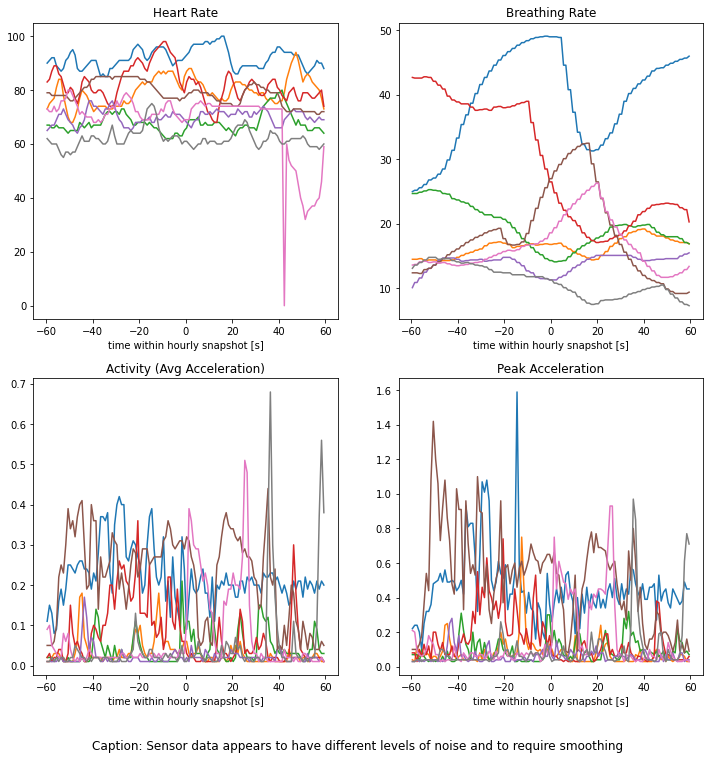

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[12,12])
fig.suptitle('Caption: Sensor data appears to have different levels of noise and to require smoothing',y=0.05)

#plot every other 'window'
for k in range(0,physio_main_i_j_hourly['event_id'].nunique(),2): 
    physio_main_i_j_k = physio_main_i_j_hourly[physio_main_i_j_hourly['event_id']==k]
    axes[0,0].plot(physio_main_i_j_k['time_from_event'],physio_main_i_j_k['HR'])
    axes[0,0].set_title('Heart Rate')
    axes[0,0].set_xlabel('time within hourly snapshot [s]')
    #axes[0,0].set_legend(physio_main_i_j_hourly['event_id'].unique(),loc='best')
    axes[0,1].plot(physio_main_i_j_k['time_from_event'],physio_main_i_j_k['BR'])
    axes[0,1].set_title('Breathing Rate')
    axes[0,1].set_xlabel('time within hourly snapshot [s]')
    axes[1,0].plot(physio_main_i_j_k['time_from_event'],physio_main_i_j_k['Activity'])
    axes[1,0].set_title('Activity (Avg Acceleration)')
    axes[1,0].set_xlabel('time within hourly snapshot [s]')
    axes[1,1].plot(physio_main_i_j_k['time_from_event'],physio_main_i_j_k['PeakAccel'])
    axes[1,1].set_title('Peak Acceleration')
    axes[1,1].set_xlabel('time within hourly snapshot [s]')

In [63]:
#Let's try to strongly smoothen the data with a rolling window and looking over a much longer timescale to see if patterns
#are more visible:

In [64]:
moving_avg_size_s = 120
physio_main_i_j_df_smooth = physio_main_i_j_df.rolling(moving_avg_size_s).mean()

In [65]:
physio_main_i_j_df_smooth['timestamp']=physio_main_i_j_df['timestamp']

In [66]:
win_to_extract_s_smooth = 30*60 #(30mins window)
physio_main_i_j_hourly_smooth = extract_data_around_timestamps(df=physio_main_i_j_df_smooth,timestamps=hour_timestamps_i_j,time_win_s=[-win_to_extract_s_smooth/2,win_to_extract_s_smooth/2])

<ipython-input-48-bd8020af3e83>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['time_from_event']=df_temp['timestamp']-ts
<ipython-input-48-bd8020af3e83>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['time_from_event'] = df_temp['time_from_event'].apply(lambda x: x.total_seconds())
<ipython-input-48-bd8020af3e83>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [67]:
physio_main_i_j_hourly_smooth

,HR,BR,PeakAccel,Activity,timestamp,time_from_event,event_id
3431,73.250000,14.193333,0.104167,0.036083,2014-10-01 07:15:00.435,-899.565,0
3432,73.250000,14.120833,0.104250,0.036000,2014-10-01 07:15:01.435,-898.565,0
3433,73.233333,14.048333,0.105083,0.036000,2014-10-01 07:15:02.435,-897.565,0
3434,73.216667,13.978333,0.105083,0.035917,2014-10-01 07:15:03.435,-896.565,0
3435,73.208333,13.908333,0.105167,0.035917,2014-10-01 07:15:04.435,-895.565,0
...,...,...,...,...,...,...,...
55626,63.508333,11.234167,0.190917,0.101917,2014-10-01 21:44:55.435,895.435,14
55627,63.433333,11.205000,0.194417,0.103833,2014-10-01 21:44:56.435,896.435,14
55628,63.358333,11.176667,0.195417,0.104583,2014-10-01 21:44:57.435,897.435,14
55629,63.291667,11.148333,0.198750,0.106917,2014-10-01 21:44:58.435,898.435,14


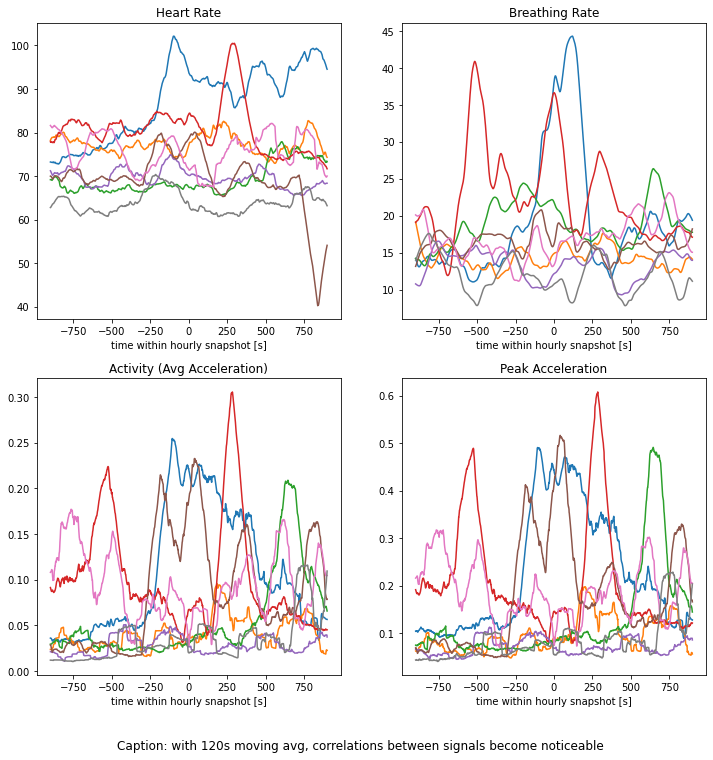

In [68]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[12,12])
fig.suptitle('Caption: with {}s moving avg, correlations between signals become noticeable'.format(moving_avg_size_s),y=0.05)

for k in range(0,physio_main_i_j_hourly_smooth['event_id'].nunique(),2):
    physio_main_i_j_k = physio_main_i_j_hourly_smooth[physio_main_i_j_hourly_smooth['event_id']==k]
    axes[0,0].plot(physio_main_i_j_k['time_from_event'],physio_main_i_j_k['HR'])
    axes[0,0].set_title('Heart Rate')
    axes[0,0].set_xlabel('time within hourly snapshot [s]')
    #axes[0,0].legend(physio_main_i_j_hourly_smooth['event_id'].unique(),loc='best')
    axes[0,1].plot(physio_main_i_j_k['time_from_event'],physio_main_i_j_k['BR'])
    axes[0,1].set_title('Breathing Rate')
    axes[0,1].set_xlabel('time within hourly snapshot [s]')
    axes[1,0].plot(physio_main_i_j_k['time_from_event'],physio_main_i_j_k['Activity'])
    axes[1,0].set_title('Activity (Avg Acceleration)')
    axes[1,0].set_xlabel('time within hourly snapshot [s]')
    axes[1,1].plot(physio_main_i_j_k['time_from_event'],physio_main_i_j_k['PeakAccel'])
    axes[1,1].set_title('Peak Acceleration')
    axes[1,1].set_xlabel('time within hourly snapshot [s]')


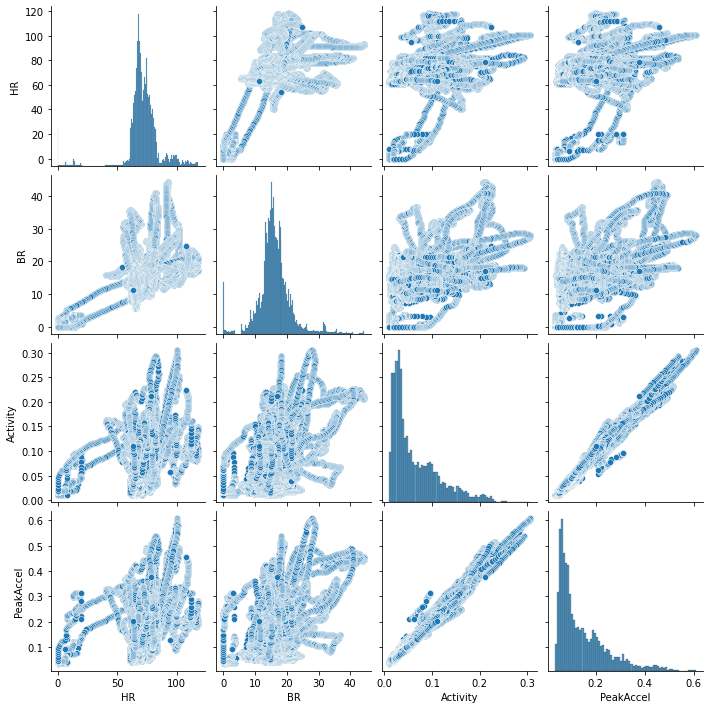

In [69]:
#Clearly activity (mean acceleration) and Peak Acceleration are strongly correlated once smoothed,
#and there seems to be some correlation between activity and HR/BR (especially when high, perhaps during exercise)
sns.pairplot(physio_main_i_j_hourly_smooth[['HR','BR','Activity','PeakAccel']])

#### 2) Windows of time following each meal (to look for meal-related trends)

In [70]:
#Let's consider only the main meals for now - those with all information on calories, etc.

In [71]:
meals_allinfo_i_df

,calories,balance,quality,sensor_folder,timestamp
3,1578,Unbalance,Medium quality,2014-10-01,2014-10-01 11:45:00
5,334,Unbalance,Good quality,2014-10-01,2014-10-01 19:42:00
8,478,Unbalance,Medium quality,2014-10-02,2014-10-02 06:40:00
11,1132,Unbalance,Medium quality,2014-10-02,2014-10-02 12:35:00
14,990,Unbalance,Good quality,2014-10-02,2014-10-02 18:35:00
16,707,Unbalance,Medium quality,2014-10-03,2014-10-03 06:43:00
18,659,Balance,Good quality,2014-10-03,2014-10-03 12:14:00
20,667,Balance,Medium quality,2014-10-03,2014-10-03 19:35:00
23,370,Unbalance,Medium quality,2014-10-04,2014-10-04 06:38:00
26,490,Unbalance,Medium quality,2014-10-01,2014-10-01 06:41:00


In [72]:
win_after_meal_s = 90*60 #(1.5 hours, based on literature since peak effect on HR should be 30-60mins after meal)
physio_main_i_j_after_meals = extract_data_around_timestamps(df=physio_main_i_j_df_smooth,timestamps=meals_allinfo_i_df['timestamp'],time_win_s=[0,win_after_meal_s])

<ipython-input-48-bd8020af3e83>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['time_from_event']=df_temp['timestamp']-ts
<ipython-input-48-bd8020af3e83>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['time_from_event'] = df_temp['time_from_event'].apply(lambda x: x.total_seconds())
<ipython-input-48-bd8020af3e83>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [73]:
physio_main_i_j_after_meals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16200 entries, 19631 to 6790
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   HR               16200 non-null  float64       
 1   BR               16200 non-null  float64       
 2   PeakAccel        16200 non-null  float64       
 3   Activity         16200 non-null  float64       
 4   timestamp        16200 non-null  datetime64[ns]
 5   time_from_event  16200 non-null  float64       
 6   event_id         16200 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 1012.5+ KB


In [74]:
physio_main_i_j_after_meals['event_id'].unique()

array([0, 1, 9], dtype=object)

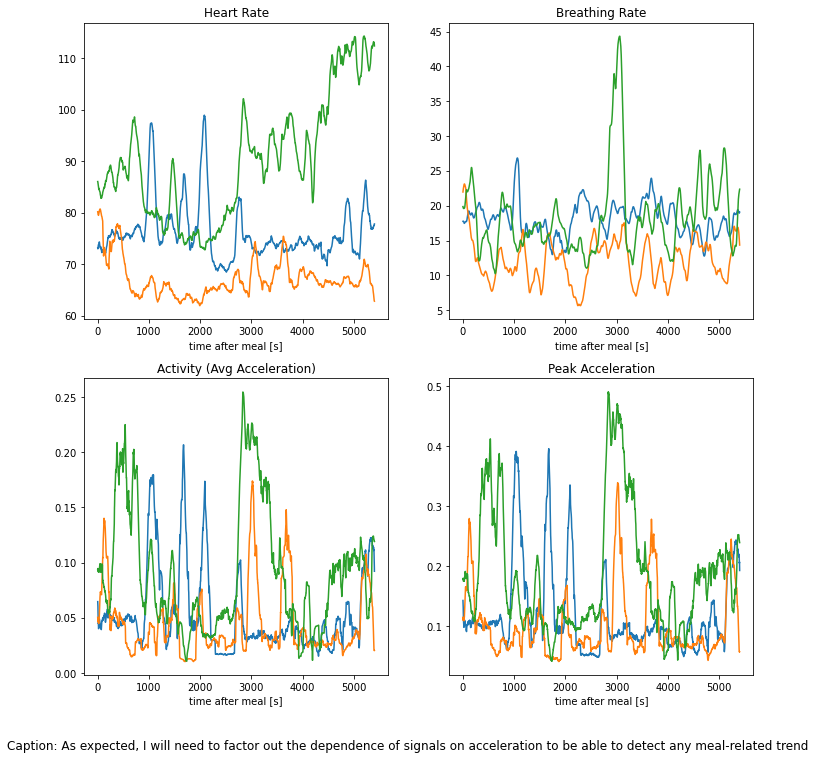

In [75]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[12,12])
fig.suptitle('Caption: As expected, I will need to factor out the dependence of signals on acceleration to be able to detect any meal-related trend',y=0.05)

for k in physio_main_i_j_after_meals['event_id'].unique(): #range(0,physio_main_i_j_after_meals['event_id'].nunique()):
    physio_main_i_j_k = physio_main_i_j_after_meals[physio_main_i_j_after_meals['event_id']==k]
    axes[0,0].plot(physio_main_i_j_k['time_from_event'],physio_main_i_j_k['HR'])
    axes[0,0].set_title('Heart Rate')
    axes[0,0].set_xlabel('time after meal [s]')
    #axes[0,0].legend(physio_main_i_j_after_meals['event_id'].unique(),loc='best')
    axes[0,1].plot(physio_main_i_j_k['time_from_event'],physio_main_i_j_k['BR'])
    axes[0,1].set_title('Breathing Rate')
    axes[0,1].set_xlabel('time after meal [s]')
    axes[1,0].plot(physio_main_i_j_k['time_from_event'],physio_main_i_j_k['Activity'])
    axes[1,0].set_title('Activity (Avg Acceleration)')
    axes[1,0].set_xlabel('time after meal [s]')
    axes[1,1].plot(physio_main_i_j_k['time_from_event'],physio_main_i_j_k['PeakAccel'])
    axes[1,1].set_title('Peak Acceleration')
    axes[1,1].set_xlabel('time after meal [s]')